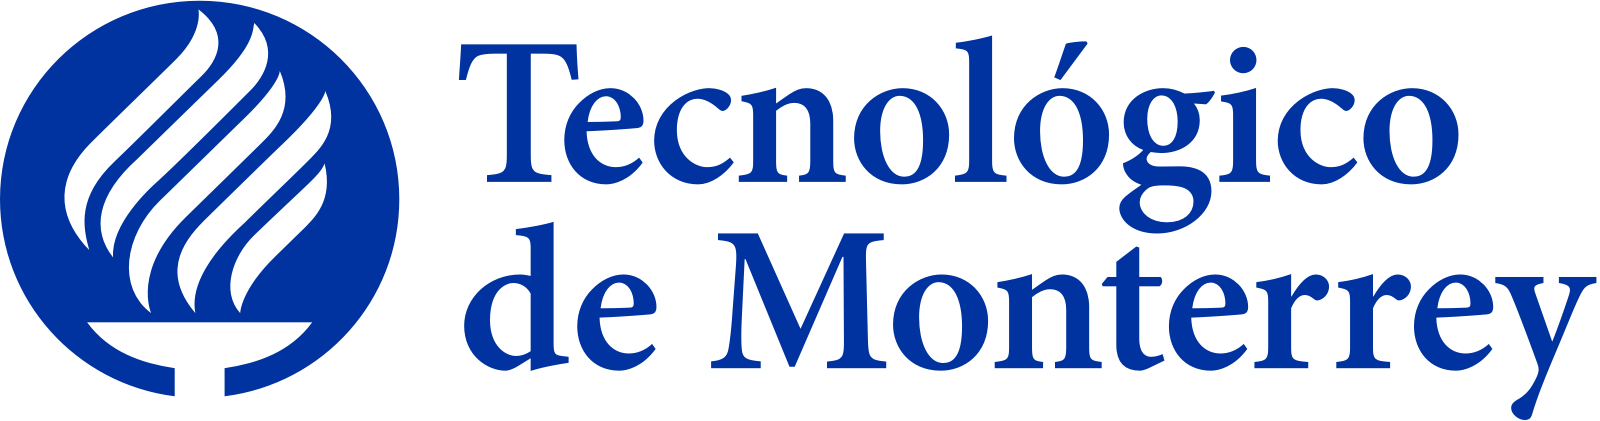




# Inteligencia Artificial Avanzada para la Ciencia de Datos

# Primer MVP


### Equipo:



Pablo Gabriel Galeana Benítez - A01735281

Leonardo Ramírez Ramírez - A01351715

Miguel Chávez Silva - A01661109

Alessandro Arguelles Elias - A00829536

Luis Eduardo Aguilar Moreno - A01367545

Agustín Tapia - A01367639


# Introducción: Avance de la Semana

Durante esta semana de desarrollo, se han logrado avances sustanciales en dos áreas clave de nuestro proyecto: la generación de texto mediante GPT-2 y la generación de imágenes mediante Stable-Diffusion. Nuestro enfoque se ha centrado en explorar las capacidades de la generación de contenido textual y visual, y en cómo estas tecnologías pueden converger para ofrecer soluciones innovadoras.

Por el momento, nuestro enfoque se centra en asegurar que el generador de texto funcione correctamente. A pesar de los avances logrados, aún existen áreas de mejora por abordar que se irán revisando a lo largo del avance del proyecto.

Simultáneamente, se han dado pasos significativos en la creación de un generador de imágenes. Se ha explorado la arquitectura de modelos, la manipulación de datos y la generación de contenido visual a partir de descripciones textuales.

A medida que avanzamos hacia la convergencia de estas dos disciplinas, nos encontramos más cerca de ofrecer soluciones integrales que combinan texto y elementos visuales para proporcionar experiencias ricas y atractivas a los usuarios.

Nuestros avances en ambas áreas nos permiten acercarnos a la entrega exitosa del proyecto, cumpliendo con las expectativas del reto propuesto.




## Modelo generativo de texto: GPT-2

Se hizo la primera implementación del modelo GPT-2 para la generación de texto. Los pasos seguidos se describen a continuación.

##Generación de Texto

In [ ]:
# Instalación de la librerías necesarias en Colab
!pip install tensorflow
!pip install gpt-2-simple

  Preparing metadata (setup.py) ... done
  Created wheel for gpt-2-simple: filename=gpt_2_simple-0.8.1-py3-none-any.whl size=24557 sha256=1b75056184ae703d78740a20fea5d148116b602055e7fd3843b7b87956a47e31
  Stored in directory: /root/.cache/pip/wheels/df/6a/fe/10d3223f78d1ac3e4c83bb4c5e2d28dfb1789c2fb4cc7ea8d0
Successfully built gpt-2-simple


In [ ]:
import gpt_2_simple as gpt2
from datetime import datetime

# Descargamos el modelo con 355M de datos de entrenamiento
gpt2.download_gpt2(model_name="355M")

# Inicio de decisión en Colab para la utilización de las librerías y paquetes necesarios
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, model_name="355M")

Fetching checkpoint: 1.05Mit [00:00, 1.47Git/s]                                                     
Fetching encoder.json: 1.05Mit [00:02, 521kit/s]
Fetching hparams.json: 1.05Mit [00:00, 4.97Git/s]                                                   
Fetching model.ckpt.data-00000-of-00001: 1.42Git [02:29, 9.49Mit/s]                                 
Fetching model.ckpt.index: 1.05Mit [00:00, 3.29Git/s]                                               
Fetching model.ckpt.meta: 1.05Mit [00:01, 554kit/s]
Fetching vocab.bpe: 1.05Mit [00:01, 708kit/s]


Loading pretrained model models/355M/model.ckpt


### Pruebas iniciales
Una vez cargado el modelo en Colab, se procedió a realizar algunos intentos con diferentes prompts.

In [ ]:
prompt = 'What is the capital of France?'

# Generar texto
text = gpt2.generate(sess, model_name="355M", prefix=prompt, length=10, temperature=0.6, return_as_list=True)[0]
print(text)

What is the capital of France?

The capital of France is Paris, which


In [ ]:
prompt = "Create a captivating narrative where the central character is a can of Coca-Cola with a burning desire to achieve the status of the world's ultimate super beverage. Explore its journey, challenges, and the creative ways it employs marketing, innovation, and perhaps even superpowers to attain this ambitious goal."

# Generar texto
text = gpt2.generate(sess, model_name="355M", prefix=prompt, length=250, temperature=0.9, return_as_list=True)[0]
print(text)

Create a captivating narrative where the central character is a can of Coca-Cola with a burning desire to achieve the status of the world's ultimate super beverage. Explore its journey, challenges, and the creative ways it employs marketing, innovation, and perhaps even superpowers to attain this ambitious goal.

The most successful stories are the ones that outsmart the marketing, innovation, and superpowers.

The return of unlimited soda profit, The perfect MMORPG

A that seeks to help its players escape the drudgery of guilds, A that can be given a beginner run by a novice, A that offers new players access to specialist levels on themselves, and more, sign us up and enjoy our free digital edition.

The hero's adventure

We see Reflections as a gaming experience that seeks and reveals what's contained within our expectations of way of experience, and expanding on the journey of Sam being able to see this suggests meaning in this.

Simply being able to take our starting point into a n

In [ ]:
prompt = 'Generate a detailed marketing strategy to increase the sales of Coca-Cola products in my medium-sized store. Please provide a concrete action plan with specific steps, focusing on promotion, advertising, and sales strategies'

# Generar texto
text = gpt2.generate(sess, model_name="355M", prefix=prompt, length=250, temperature=0.5, return_as_list=True)[0]
print(text)

Generate a detailed marketing strategy to increase the sales of Coca-Cola products in my medium-sized store. Please provide a concrete action plan with specific steps, focusing on promotion, advertising, and sales strategies. I will evaluate your plan as soon as possible after receiving your proposal.

I will review your plan and provide you with feedback on your proposal. I will also provide you with a detailed copy of the proposal. I will also provide you with a copy of the proposal for my review.

I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review. I will provide you with a copy of the proposal for my review

### Resultados
De los resultados anteriores y algunos otros que se realizaron, se cumplió el objetivo de generar texto con base a un prompt específico. Se confirmó que gpt-2 tiene la capacidad de responder preguntas específicas, además de crear historias creativas según las intrucciones dadas. Sin embargo, para controlar la estructura del output se recalca la importancia de modificar los parámetros de **length** y **temperature**, los cuales controlan la longitud final del texto generado y qué tan creativo o formal debe ser el resultado final respectivamente.

Se encontraron algunos problemas al generar la estrategia de marketing pues el modelo no es capaz de generar una estrategia consisa o coherente. En la mayoría de los intentos éste generó un texto con el mismo prompt copiado y pegado repetidas veces, así como historias ficticias que poca relación guardan con una estrategia de marketing pragmática y real.

### Propuestas de mejora
Para mejorar los resultados de texto se propone:


* Mejorar la estructura del prompt tratando de ser lo más adecuadamente específico posible
* Tratar con texto generativo en español
* Realizar una investigacióon más profunda sobre los parámetros que influyen en la respuesta del modelo con el fin de ajustarlos
* Intentar la generación de texto con un modelo con mayores datos de entrenamiento como el gpt-2 de 774M de datos de entrenamiento (este en particular se evaluará el rendimiento pues, al ser un modelo más óptimo, éste consume más recursos computacionales)





## Modelo generativo de texto a imagen: Stable-Diffusion by Runway

La primera implementación del modelo texto a imagen se dio con el modelo Stable-Diffusion de Runway.

##Generación de imagenes

Primeramente, dado que es un modelo de generación de imagenes, es bastante pesado en terminos de computación y por eso debe de usarse una GPU para acelerar los procesos. Colab ofrece la posibilidad de trabajar con una maquina virtual y utilizar una GPU de 15GB con el plan gratuito, la cual es suficiente para utilizar del modelo.

Una vez seleccionado el entorno de computación en Colab, se verifica que la GPU esta este disponible para su uso.

In [ ]:
import torch

# Verificar la disponibilidad de la GPU
if torch.cuda.is_available():
    print('GPU disponible')
else:
    print('GPU no disponible')


GPU disponible


Posteriormente, dado que el modelo trabaja con un ambiente de Anaconda y debe de cargar el modelo, se necesita dar acceso a los archivos de drive para que pueda trabajar con ellos.

In [ ]:
from google.colab import drive

#Carga el drive
drive.mount("/content/gdrive")

!pwd #Nos muestra la ubicación actual

#Nos movemos hacia el directorio
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion"

Mounted at /content/gdrive
/content
/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion


Como se menciono anteriormente, el modelo utiliza entornos de Anaconda para funcionar, por ello, es necesario instalar el programa en la maquina virtual. Primero se crea un directorio y se descarga el ejectuable para posteriormente instalarlo.

In [ ]:
#Creamos un directorio
#!mkdir Anaconda

#Nos movemos hacia el
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/Anaconda"

#Descargamos Anaconda
#!wget https://repo.anaconda.com/archive/Anaconda3-2023.07-2-Linux-x86_64.sh

/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/Anaconda


In [ ]:
#Una vez descargado, lo instalamos
! bash Anaconda3-2023.07-2-Linux-x86_64.sh


Welcome to Anaconda3 2023.07-2

In order to continue the installation process, please review the license
agreement.
Please, press ENTER to continue
>>> 
End User License Agreement - Anaconda Distribution

Copyright 2015-2023, Anaconda, Inc.

All rights reserved under the 3-clause BSD License:

This End User License Agreement (the "Agreement") is a legal agreement between you and Anaconda, Inc
. ("Anaconda") and governs your use of Anaconda Distribution (which was formerly known as Anaconda I
ndividual Edition).

Subject to the terms of this Agreement, Anaconda hereby grants you a non-exclusive, non-transferable
 license to:

  * Install and use the Anaconda Distribution (which was formerly known as Anaconda Individual Editi
on),
  * Modify and create derivative works of sample source code delivered in Anaconda Distribution from
 Anaconda's repository, and;
  * Redistribute code files in source (if provided to you by Anaconda as source) and binary forms, w
ith or without modification s

Una vez instalado Anaconda, agregamos conda a las variables de entorno.

In [ ]:
import os
os.environ['PATH'] = '/root/anaconda3/bin:' + os.environ['PATH']


Con todo lo anterior realizado, podemos comenzar a trabajar con el modelo. Se empieza clonando del repositorio en la carpeta principal y después moviendonos hacia él.

In [ ]:
#Nos movemos hacia el directorio
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion"

#Clonamos el repositorio
#!git clone https://github.com/runwayml/stable-diffusion

/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion


In [ ]:
#Nos movemos hacia el directorio del repositorio clonado
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion"

/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion


Ya con el repositorio, se instala el ambiente definido por los creadores del modelo

In [ ]:
!conda env create -f environment.yaml

Se truncaron las últimas líneas 5000 del resultado de transmisión.








cudatoolkit-11.3.1   | 549.3 MB  | :  38% 0.37808271705699875/1 [00:10<00:11, 18.79s/it]











pytorch-1.11.0       | 1.02 GB   | :  21% 0.20762533647264328/1 [00:10<00:24, 30.45s/it]















cudatoolkit-11.3.1   | 549.3 MB  | :  38% 0.38451163091260643/1 [00:10<00:10, 17.78s/it]











pytorch-1.11.0       | 1.02 GB   | :  21% 0.21095558534219658/1 [00:10<00:24, 31.56s/it]















cudatoolkit-11.3.1   | 549.3 MB  | :  39% 0.3902578282525743/1 [00:11<00:10, 17.69s/it] 











pytorch-1.11.0       | 1.02 GB   | :  21% 0.21437543732034772/1 [00:11<00:24, 30.89s/it]















cudatoolkit-11.3.1   | 549.3 MB  | :  40% 0.39631693732887713/1 [00:11<00:10, 17.36s/it]











pytorch-1.11.0       | 1.02 GB   | :  22% 0.21961721917332175/1 [00:11<00:20, 26.31s/it]















cudatoolkit-11.3.1   | 549.3 MB  | :  40% 0.40402594465130937/1 [00:11<00:09, 16.08s/it]











pytorch-1

Naturalmente, el paso siguiente sería activar el ambiente, sin embargo la activación y el script deben de ser ejecutados simultaneamente, pero para ejecutar el modelo se requiere contar con los checkpoints que deben de ser descargados desde Hugging Face. Entonces, primero se descargan los checkpoints.

Para el fin de este documento, solo me mostrará como se descargo la primera versión, la cual tambien es la más ligera.

In [ ]:
#Nos movemos hacia el directorio del repositorio clonado
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/models/ldm"


#Creamos un directorio
#!mkdir stable-diffusion-v1

#Nos movemos hacia el checkpoint
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/models/ldm/stable-diffusion-v1-4"


#Descargamos el peso
#!wget https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt

#Regresamos a al principal
%cd "/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion"

/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/models/ldm
/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/models/ldm/stable-diffusion-v1-4
--2023-10-23 04:16:01--  https://huggingface.co/CompVis/stable-diffusion-v-1-4-original/resolve/main/sd-v1-4.ckpt
Resolving huggingface.co (huggingface.co)... 18.172.134.88, 18.172.134.124, 18.172.134.24, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.88|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/4c/37/4c372b4ebb57bbd02e68413d4951aa326d4b3cfb6e62db989e529c6d4b26fb21/fe4efff1e174c627256e44ec2991ba279b3816e364b49f9be2abc0b3ff3f8556?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27sd-v1-4.ckpt%3B+filename%3D%22sd-v1-4.ckpt%22%3B&Expires=1698289170&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTY5ODI4OTE3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5n

Una vez teniendo los pesos se puede utilizar el modelo. Para ello, se definió un tamaño de imagen de 512x512 pixeles y se configuró para que solo genere una imagen a la vez. Se probaron las primeras 4 versiones del modelo.

Primera versión

In [ ]:
!source activate ldm && python scripts/txt2img.py \
--prompt "Design a captivating Coca-Cola ad that celebrates refreshment, happiness, and iconic red branding. Showcase a cold Coca-Cola bottle surrounded by bubbles and condensation. Make it clear that Coca-Cola is the ultimate choice for any occasion, conveying the joy of Coca-Cola!" \
--plms --skip_grid --H 512 --W 512 --n_samples 1 --n_rows 1 --n_iter 1 \
--ckpt models/ldm/stable-diffusion-v1/sd-v1-1.ckpt \
--outdir outputs/txt2img-samples/samples/stable-diffusion-v1


Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1/sd-v1-1.ckpt
Global Step: 194366
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.8.mlp.fc2.bias', 'vision_model.encoder.layers.8.self_attn.k_proj.weight', 'vision_model.encoder.layers.16.layer_norm2.bias', 'vision_model.encoder.layers.23.self_attn.v_proj.bias', 'vision_model.encoder.layers.0.self_attn.k_proj.weight', 'vision_model.encoder.layers.10.self_attn.q_proj.weight', 'vision_model.encoder.layers.13.layer_norm2.bias', 'visual_projection.weight', 'vision_model.encoder.layers.22.layer_norm2.bias', 'vision_model.encoder.layers.13.mlp.fc2.bias', 'vision_model.encod

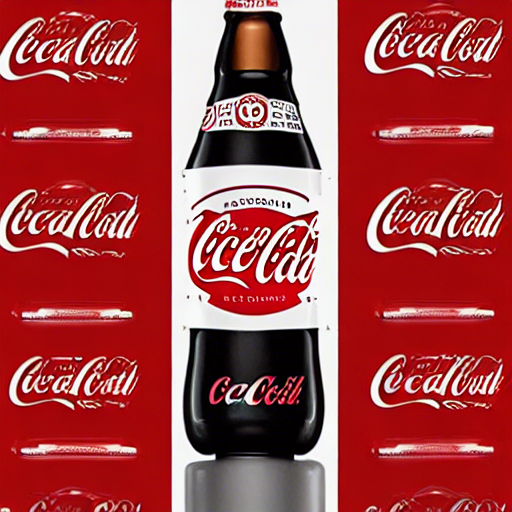

In [ ]:
from IPython.display import Image

# Ruta a la imagen
ruta_imagen = '/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/outputs/txt2img-samples/samples/stable-diffusion-v1/samples/00001.png'

# Muestra la imagen
Image(filename=ruta_imagen)

Segunda version

In [ ]:
!source activate ldm && python scripts/txt2img.py \
--prompt "Design a captivating Coca-Cola ad that celebrates refreshment, happiness, and iconic red branding. Showcase a cold Coca-Cola bottle surrounded by bubbles and condensation. Make it clear that Coca-Cola is the ultimate choice for any occasion, conveying the joy of Coca-Cola!" \
--plms --skip_grid --H 512 --W 512 --n_samples 1 --n_rows 1 --n_iter 1 \
--ckpt models/ldm/stable-diffusion-v1-2/sd-v1-2.ckpt \
--outdir outputs/txt2img-samples/samples/stable-diffusion-v2


Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1-2/sd-v1-2.ckpt
Global Step: 245000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.7.self_attn.q_proj.bias', 'vision_model.encoder.layers.20.self_attn.out_proj.bias', 'vision_model.encoder.layers.3.self_attn.out_proj.bias', 'vision_model.encoder.layers.8.self_attn.q_proj.weight', 'vision_model.encoder.layers.2.mlp.fc1.weight', 'vision_model.encoder.layers.2.mlp.fc2.bias', 'vision_model.encoder.layers.3.self_attn.out_proj.weight', 'vision_model.encoder.layers.3.mlp.fc2.weight', 'vision_model.pre_layrnorm.weight', 'vision_model.encoder.layers.2.self_attn.v_proj.bias', 

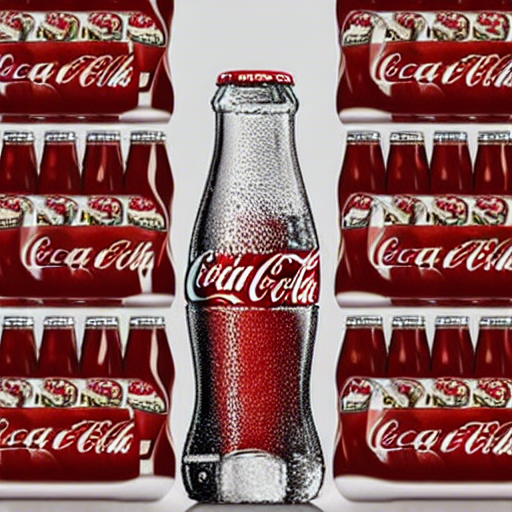

In [ ]:
from IPython.display import Image

# Ruta a la imagen
ruta_imagen = '/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/outputs/txt2img-samples/samples/stable-diffusion-v2/samples/00001.png'

# Muestra la imagen
Image(filename=ruta_imagen)

Tercera versión

In [ ]:
!source activate ldm && python scripts/txt2img.py \
--prompt "Design a captivating Coca-Cola ad that celebrates refreshment, happiness, and iconic red branding. Showcase a cold Coca-Cola bottle surrounded by bubbles and condensation. Make it clear that Coca-Cola is the ultimate choice for any occasion, conveying the joy of Coca-Cola!" \
--plms --skip_grid --H 512 --W 512 --n_samples 1 --n_rows 1 --n_iter 1 \
--ckpt models/ldm/stable-diffusion-v1-3/sd-v1-3.ckpt \
--outdir outputs/txt2img-samples/samples/stable-diffusion-v3


Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1-3/sd-v1-3.ckpt
Global Step: 440000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.9.self_attn.v_proj.bias', 'vision_model.encoder.layers.7.self_attn.v_proj.bias', 'vision_model.encoder.layers.15.mlp.fc1.weight', 'vision_model.encoder.layers.23.mlp.fc1.bias', 'vision_model.encoder.layers.3.layer_norm1.weight', 'vision_model.encoder.layers.16.self_attn.v_proj.bias', 'vision_model.encoder.layers.14.self_attn.out_proj.weight', 'vision_model.encoder.layers.19.layer_norm2.bias', 'vision_model.encoder.layers.15.self_attn.v_proj.weight', 'vision_model.encoder.layers.6.layer

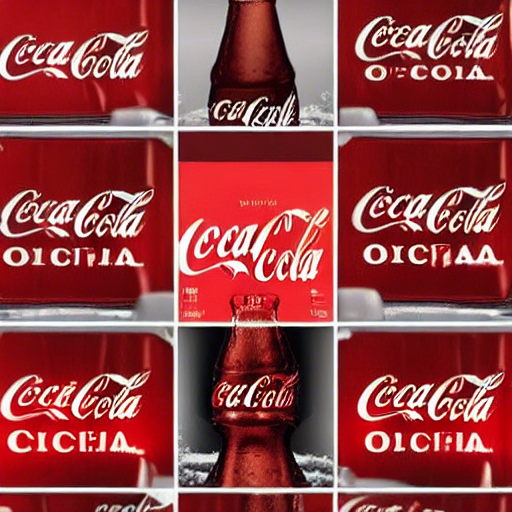

In [ ]:
from IPython.display import Image

# Ruta a la imagen
ruta_imagen = '/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/outputs/txt2img-samples/samples/stable-diffusion-v3/samples/00001.png'

# Muestra la imagen
Image(filename=ruta_imagen)

Cuarta versión

In [ ]:
!source activate ldm && python scripts/txt2img.py \
--prompt "Design a captivating Coca-Cola ad that celebrates refreshment, happiness, and iconic red branding. Showcase a cold Coca-Cola bottle surrounded by bubbles and condensation. Make it clear that Coca-Cola is the ultimate choice for any occasion, conveying the joy of Coca-Cola!" \
--plms --skip_grid --H 512 --W 512 --n_samples 1 --n_rows 1 --n_iter 1 \
--ckpt models/ldm/stable-diffusion-v1-4/sd-v1-4.ckpt \
--outdir outputs/txt2img-samples/samples/stable-diffusion-v4


Global seed set to 42
Loading model from models/ldm/stable-diffusion-v1-4/sd-v1-4.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.13.mlp.fc1.bias', 'vision_model.encoder.layers.11.layer_norm2.bias', 'vision_model.encoder.layers.10.self_attn.k_proj.weight', 'vision_model.encoder.layers.8.layer_norm1.weight', 'vision_model.encoder.layers.23.mlp.fc2.bias', 'vision_model.encoder.layers.11.mlp.fc2.weight', 'vision_model.encoder.layers.13.mlp.fc2.weight', 'vision_model.encoder.layers.7.self_attn.v_proj.bias', 'vision_model.encoder.layers.15.mlp.fc1.weight', 'vision_model.encoder.layers.2.self_attn.v_proj.bias', 'vision

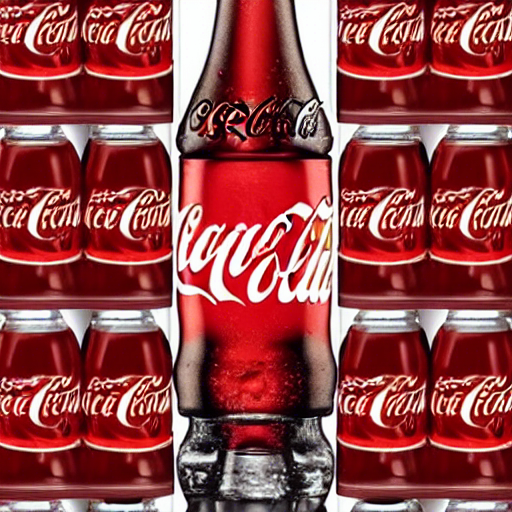

In [ ]:
from IPython.display import Image

# Ruta a la imagen
ruta_imagen = '/content/gdrive/Shareddrives/IA avanzada/Stable-Diffusion/stable-diffusion/outputs/txt2img-samples/samples/stable-diffusion-v4/samples/00001.png'

# Muestra la imagen
Image(filename=ruta_imagen)

### Resultados
A través de las imagenes, hay algunos resultados pertinentes que deben de presentarse. En primer lugar esta la limitación clara del modelo para generar imagenes con texto legible, un punto importante si se considera el proposito de su uso. Simultaneamente, el modelo parece necesitar de más iteraciones para mejorar la imagen y finalmente, es claro que el modelo trabaja mejor con prompts pequeños, ya que solo esta recopilando información de las primeras palabras.



### Propuestas de mejora
Para mejorar los resultados de imagen se propone:


* Utilizar una maquina virtual con mayor capacidad, tanto en GPU como en CPU, ya que esto permititiría la utilización de más iteraciones en el modelo y por consiguiente, mejores imagenes.
* Probar con más pesos e incluso otros modelos que trabajen bajo el mismo algoritmo y que sean capaces de generar texto legible.
* Usar el modelo en modo imagen a imagen, introduciendo un boceto de lo deseado.